In [33]:

import tensorflow as tf


In [85]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 3253-6492

 Directory of C:\Users\afree\Assignment-3-AI

13-10-2022  11:29 PM    <DIR>          .
13-10-2022  08:15 PM    <DIR>          ..
13-10-2022  07:27 PM    <DIR>          .ipynb_checkpoints
13-10-2022  11:29 PM            11,801 Assignment-3-AI.ipynb
13-10-2022  11:26 PM    <DIR>          Flowers-Dataset
13-10-2022  06:33 PM       235,663,188 Flowers-Dataset.zip
               2 File(s)    235,674,989 bytes
               4 Dir(s)  397,385,011,200 bytes free


In [86]:
pwd

'C:\\Users\\afree\\Assignment-3-AI'

# Downloading the Dataset

In [87]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [88]:
train_datagen=ImageDataGenerator(rescale=1./255,horizontal_flip= True,vertical_flip=True,zoom_range=0.2)

In [89]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [92]:
x_train = train_datagen.flow_from_directory(r"Flowers-Dataset\flowers",target_size = (64,64),class_mode="categorical",batch_size=24)

Found 4317 images belonging to 5 classes.


In [93]:
x_test = test_datagen.flow_from_directory(r"Flowers-Dataset\flowers",target_size = (64,64),class_mode="categorical",batch_size=24)

Found 4317 images belonging to 5 classes.


# Model Creation and Adding Layers

In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense


In [95]:
model = Sequential()

In [96]:
model.add(Convolution2D(32,(3,3),activation="relu",input_shape=(64,64,3)))

In [97]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [98]:
model.add(Flatten())

In [99]:
model.add(Dense(300,activation="relu"))

In [100]:
model.add(Dense(300,activation="relu"))

In [106]:
model.add(Dense(5,activation="softmax"))

# Compiling the model

In [107]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"],optimizer='adam')

In [108]:
len(x_train)

180

# Fitting the model

In [109]:
model.fit(x_train, epochs=5,validation_data=x_test,steps_per_epoch=len(x_train),validation_steps=len(x_test))

Epoch 1/5
180/180 [==============================] - 76s 419ms/step - loss: 1.6227 - accuracy: 0.2432 - val_loss: 1.6094 - val_accuracy: 0.2437
Epoch 2/5
180/180 [==============================] - 40s 224ms/step - loss: 1.6045 - accuracy: 0.2437 - val_loss: 1.6010 - val_accuracy: 0.2437
Epoch 3/5
180/180 [==============================] - 43s 239ms/step - loss: 1.6001 - accuracy: 0.2437 - val_loss: 1.5991 - val_accuracy: 0.2437
Epoch 4/5
180/180 [==============================] - 40s 225ms/step - loss: 1.5991 - accuracy: 0.2437 - val_loss: 1.5986 - val_accuracy: 0.2437
Epoch 5/5
180/180 [==============================] - 43s 238ms/step - loss: 1.5989 - accuracy: 0.2437 - val_loss: 1.5985 - val_accuracy: 0.2437


In [110]:
test_loss, test_accuracy = model.evaluate(x_test)

180/180 [==============================] - 13s 74ms/step - loss: 1.5985 - accuracy: 0.2437


In [112]:
model.save("flowers.h5")

# Testing of the model

In [123]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [124]:
model = load_model("flowers.h5")

In [125]:
img = image.load_img("daisy.jpg", target_size=(64,64))

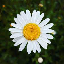

In [126]:
img

In [127]:
x = image.img_to_array(img)

In [128]:
x

array([[[16., 19.,  8.],
        [16., 20.,  5.],
        [22., 26.,  9.],
        ...,
        [22., 30., 19.],
        [27., 33., 21.],
        [34., 39., 19.]],

       [[16., 19.,  8.],
        [16., 20.,  5.],
        [18., 22.,  5.],
        ...,
        [24., 33., 16.],
        [29., 36., 18.],
        [36., 41., 19.]],

       [[19., 22., 11.],
        [15., 19.,  4.],
        [19., 23.,  6.],
        ...,
        [30., 40., 15.],
        [29., 37., 13.],
        [28., 33., 10.]],

       ...,

       [[38., 45., 14.],
        [27., 33.,  5.],
        [25., 31.,  5.],
        ...,
        [12., 16.,  1.],
        [15., 19.,  4.],
        [19., 23.,  8.]],

       [[28., 34.,  8.],
        [23., 29.,  3.],
        [29., 35.,  9.],
        ...,
        [14., 18.,  3.],
        [17., 21.,  6.],
        [21., 25., 10.]],

       [[29., 34., 12.],
        [33., 38., 15.],
        [34., 40., 14.],
        ...,
        [17., 21.,  6.],
        [20., 24.,  9.],
        [25., 29., 14.]]

In [131]:
x.ndim

3

In [132]:
x = np.expand_dims(x,axis=0)

In [133]:
x.ndim

4

In [134]:
pred = model.predict(x)

In [135]:
pred

array([[0.17449002, 0.24498786, 0.18180014, 0.17114119, 0.22758085]],
      dtype=float32)